In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

-

Loding and verifying the data

-

In [2]:
df = pd.read_csv('./aug2021_to_jul2022_ready_for_analysis.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4621853 entries, 0 to 4621852
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   ride_id           object 
 1   rideable_type     object 
 2   started_at        object 
 3   ended_at          object 
 4   member_casual     object 
 5   ride_year         int64  
 6   ride_month        object 
 7   ride_week_no      int64  
 8   ride_hour_of_day  int64  
 9   ride_day_of_week  object 
 10  weekday_weekend   object 
 11  ride_season       object 
 12  ride_len_mins     float64
dtypes: float64(1), int64(3), object(9)
memory usage: 458.4+ MB


In [4]:
df.isnull().sum()

ride_id             0
rideable_type       0
started_at          0
ended_at            0
member_casual       0
ride_year           0
ride_month          0
ride_week_no        0
ride_hour_of_day    0
ride_day_of_week    0
weekday_weekend     0
ride_season         0
ride_len_mins       0
dtype: int64

--

Lets get an overall analysis summary first

--

In [5]:
df.describe()

,ride_year,ride_week_no,ride_hour_of_day,ride_len_mins
count,4.621853e+06,4.621853e+06,4.621853e+06,4.621853e+06
mean,2.021524e+03,2.922153e+01,1.420752e+01,1.716902e+01
std,4.994458e-01,1.085855e+01,4.981340e+00,2.034397e+01
min,2.021000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.021000e+03,2.200000e+01,1.100000e+01,6.400000e+00
50%,2.022000e+03,3.000000e+01,1.500000e+01,1.120000e+01
75%,2.022000e+03,3.700000e+01,1.800000e+01,2.012000e+01
max,2.022000e+03,5.200000e+01,2.300000e+01,2.645000e+02


Findings:
1. Average ride length is 17 mins and max ride length is 264 mins which is equal to approx 4.5 hrs

In [15]:
df.describe(include=['O'])

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_month,ride_day_of_week,weekday_weekend,ride_season
count,4621853,4621853,4621853,4621853,4621853,4621853,4621853,4621853,4621853
unique,4621853,3,3970542,3974719,2,12,7,2,4
top,D6AC43863387B96A,classic_bike,2022-07-09 17:23:31,2022-06-07 16:12:09,member,August,Saturday,weekday,Summer(Jun-Aug)
freq,1,3045113,8,10,2678743,673107,776617,3137791,1934191


Findings:
1. Total 4621853 rides are taken.
2. classic_bike is the most preferred bike(rideable_type) with usage percentage of 3045113/4621853 = 66%.
3. 58% of riders are Members.
4. August month has most number of rides.
5. Saturday is the most preferred day of week.
6. Riders prefer to use Cyclistic bikes on weekdays.
7. Most preferred season for cycling is Summer (Jun-Aug).

--

Now we shall analyse by each sector for further findings.
First, Lets see all the analysis by ride count. We have to keep in mind our business task.

--

## No. of Bike Hires (count(ride_id))

### 1. Per Rider Category (Member/Casual)

In [49]:
percent_mem_cas = df.groupby(['member_casual']).ride_id.count() * 100 / df.shape[0] #for percentage result

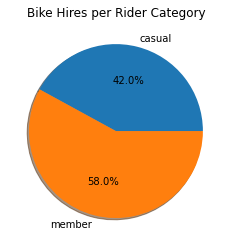

In [50]:
# Lets see through visualization
plt.pie(percent_mem_cas, labels= percent_mem_cas.index, autopct='%.1f%%', shadow=True)
plt.title('Bike Hires per Rider Category')
plt.savefig('./visualizations from py notebook/Bike Hires per Rider Category.png')
plt.show()

Findings:
* Only 58% of total bike hires are done by members and rest are done by casual riders.

### 2. Per Day of Week

In [10]:
hires_per_day = df.ride_day_of_week.value_counts(ascending=False)

In [5]:
hires_per_day

Saturday     776617
Sunday       707445
Thursday     651279
Wednesday    628786
Friday       627964
Tuesday      623840
Monday       605922
Name: ride_day_of_week, dtype: int64

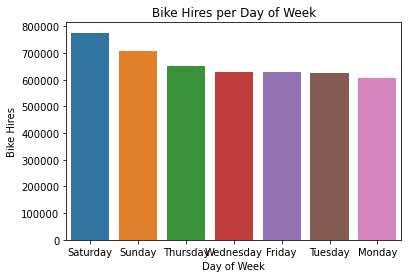

In [15]:
fig, ax = plt.subplots()
sns.barplot(x = hires_per_day.index, y = hires_per_day, ax=ax)
ax.set_xlabel('Day of Week')
ax.set_ylabel('Bike Hires')
ax.set_title('Bike Hires per Day of Week')
plt.savefig('./visualizations from py notebook/Bike Hires per Day of Week')

Findings-
1. Overall bike hires are highest is Saturday, follwed by Sunday and Thursday and lowest in Monday.

#### 2.a. Per Rider Category per Day of Week

In [4]:
#groupby
bike_hire_per_rider_category_per_day = df.groupby(['member_casual']).ride_day_of_week.value_counts(sort=True).unstack(0).sort_values('member', ascending=False)

In [139]:
bike_hire_per_rider_category_per_day

member_casual,casual,member
ride_day_of_week,,
Tuesday,204009,419831
Wednesday,210157,418629
Thursday,236976,414303
Monday,228559,377363
Friday,262982,364982
Saturday,421291,355326
Sunday,379136,328309


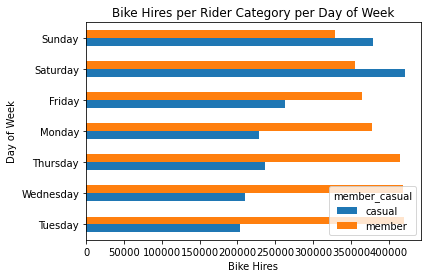

In [17]:
bike_hire_per_rider_category_per_day.plot.barh()
plt.title('Bike Hires per Rider Category per Day of Week')
plt.ylabel('Day of Week')
plt.xlabel('Bike Hires')
plt.savefig('./visualizations from py notebook/Bike Hires per Rider Category per Day of Week')

Findings-
* Casual riders preferably ride on weekends while annual members hires bikes on weekdays especially Tuesday, Wednesday and Thursday.


Recomendations-
* We should run special ad campaign on weekends for the casual riders.

### 3. Per Month

In [19]:
hires_per_month = df.ride_month.value_counts()

In [204]:
hires_per_month

August       673107
July         641720
September    620004
June         619364
May          501669
October      477200
April        272162
November     255625
March        215649
December     176207
February      89081
January       80065
Name: ride_month, dtype: int64

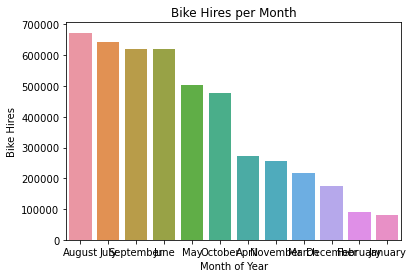

In [20]:
fig, ax = plt.subplots()
sns.barplot(x = hires_per_month.index, y = hires_per_month, ax=ax)
ax.set_xlabel('Month of Year')
ax.set_ylabel('Bike Hires')
ax.set_title('Bike Hires per Month')
plt.savefig('./visualizations from py notebook/Bike Hires per Month')

Findings-
1. June - September months have the highest number of bike hires and January, February have the lowest.

#### 3.a. Per Rider Category per Month

In [21]:
hires_per_rider_per_month = df.groupby('member_casual').ride_month.value_counts().unstack(0).sort_values('member',ascending=False)

In [207]:
hires_per_rider_per_month

member_casual,casual,member
ride_month,,
August,340323,332784
July,310840,330880
June,291230,328134
September,291935,328069
October,188427,288773
May,219483,282186
November,69769,185856
April,91600,180562
March,66917,148732


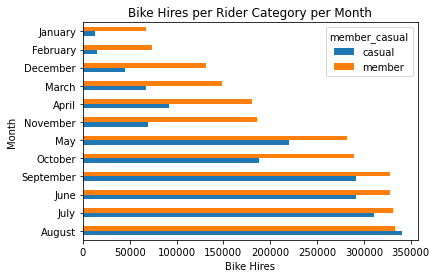

In [23]:
fig, ax = plt.subplots()
hires_per_rider_per_month.plot.barh(ax=ax)
ax.set_ylabel('Month')
ax.set_xlabel('Bike Hires')
ax.set_title('Bike Hires per Rider Category per Month')
plt.savefig('./visualizations from py notebook/Bike Hires per Rider Category per Month')

Findings-
1. We can notice the dip in bike hirings in the cold months.
2. DUring the cold months casual ridership reduced significantly.

### 4. Per Season

In [24]:
hires_per_season = df.ride_season.value_counts()

In [158]:
hires_per_season

Summer(Jun-Aug)    1934191
Autumn(Sep-Nov)    1352829
Spring(Mar-May)     989480
Winter(Dec-Feb)     345353
Name: ride_season, dtype: int64

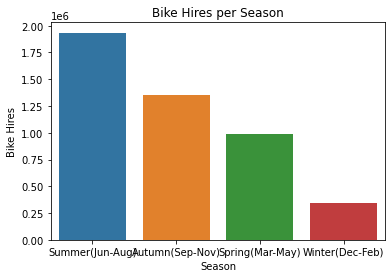

In [25]:
fig, ax = plt.subplots()
sns.barplot(x = hires_per_season.index, y = hires_per_season, ax=ax)
ax.set_xlabel('Season')
ax.set_ylabel('Bike Hires')
ax.set_title('Bike Hires per Season')
plt.savefig('./visualizations from py notebook/Bike Hires per Season')

Findings - 
1. Summer is the most preferred season overall for riders and Winter being the least.

#### 4.a. Per Rider Category per Season

In [26]:
hires_per_rider_per_season = df.groupby('member_casual').ride_season.value_counts().unstack(0).sort_values('member',ascending=False)

In [168]:
hires_per_rider_per_season

member_casual,casual,member
ride_season,,
Summer(Jun-Aug),942393,991798
Autumn(Sep-Nov),550131,802698
Spring(Mar-May),378000,611480
Winter(Dec-Feb),72586,272767


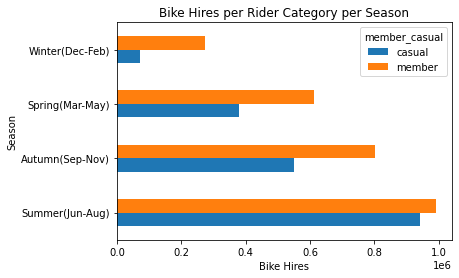

In [28]:
fig, ax = plt.subplots()
hires_per_rider_per_season.plot.barh(ax=ax)
ax.set_ylabel('Season')
ax.set_xlabel('Bike Hires')
ax.set_title('Bike Hires per Rider Category per Season')
plt.savefig('./visualizations from py notebook/Bike Hires per Rider Category per Season')

Seems like our previous analysis is true for both rider categories.

### 5. Per Hour of Day

In [29]:
hires_per_hour = df.ride_hour_of_day.value_counts().sort_index()

In [182]:
hires_per_hour

0      63628
1      41585
2      24593
3      13921
4      12180
5      37124
6      98042
7     184425
8     222920
9     176727
10    190903
11    239264
12    275378
13    278534
14    281269
15    320710
16    397026
17    475205
18    399620
19    290413
20    203772
21    163855
22    135534
23     95225
Name: ride_hour_of_day, dtype: int64

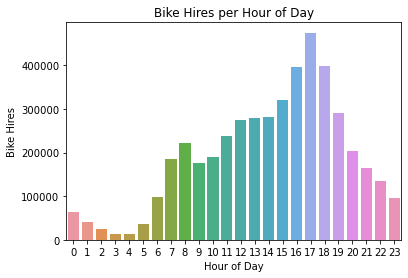

In [30]:
fig, ax = plt.subplots()
sns.barplot(x = hires_per_hour.index, y = hires_per_hour, ax=ax)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Bike Hires')
ax.set_title('Bike Hires per Hour of Day')
plt.savefig('./visualizations from py notebook/Bike Hires per Hour of Day')

Findings-
1. There is a significant increase in bike hires in the afternoon timings

Lets find if this trend any different between both rider categories

#### 5.a. Per Rider Category Per Hour of Day

In [31]:
hires_per_rider_per_hour = df.groupby('member_casual').ride_hour_of_day.value_counts().unstack(0).sort_index()

In [187]:
hires_per_rider_per_hour

member_casual,casual,member
ride_hour_of_day,,
0,37456,26172
1,25322,16263
2,15601,8992
3,8553,5368
4,5787,6393
5,9069,28055
6,20766,77276
7,38942,145483
8,52945,169975


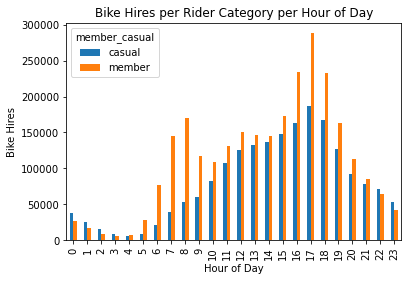

In [32]:
fig, ax = plt.subplots()
hires_per_rider_per_hour.plot.bar(ax=ax)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Bike Hires')
ax.set_title('Bike Hires per Rider Category per Hour of Day')
plt.savefig('./visualizations from py notebook/Bike Hires per Rider Category per Hour of Day')

Findings - 
1. Most bike hires has been happened in the afternoon time by both members and casual riders.
2. We can see there is a significant increase in bike hires in morning between 7-9 am for annual members. Earlier we have seen that there is an increase in bike hires on weekdays by annual members. This may indicate that riders going to work everyday prefers annual membership rather than casual riding.

## Rideable Type(Bike Type)

## 1. Preferred Rideable Type

In [33]:
bike_type_count = df.rideable_type.value_counts(ascending = False)

In [34]:
bike_type_count

classic_bike     3045113
electric_bike    1355050
docked_bike       221690
Name: rideable_type, dtype: int64

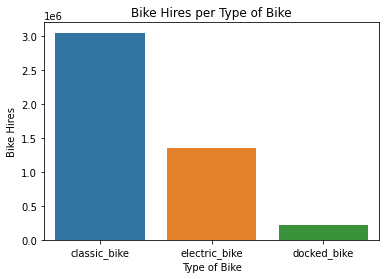

In [35]:
fig, ax = plt.subplots()
sns.barplot(x = bike_type_count.index, y = bike_type_count, ax=ax)
ax.set_xlabel('Type of Bike')
ax.set_ylabel('Bike Hires')
ax.set_title('Bike Hires per Type of Bike')
plt.savefig('./visualizations from py notebook/Bike Hires per Type of Bike')

Findings -
1. Classic Bike is the most popular bike followed by Electrric bike and Docked Bike

#### 1.a. Preferred bike type per Rider category

In [36]:
bike_type_per_rider = df.groupby('member_casual').rideable_type.value_counts().unstack(0).sort_values('member', ascending=False)

In [196]:
bike_type_per_rider

member_casual,casual,member
rideable_type,,
classic_bike,1125944.0,1919169.0
electric_bike,595476.0,759574.0
docked_bike,221690.0,NaN


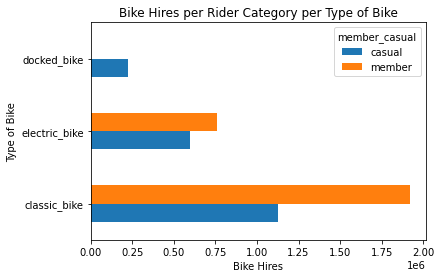

In [37]:
fig, ax = plt.subplots()
bike_type_per_rider.plot.barh(ax=ax)
ax.set_ylabel('Type of Bike')
ax.set_xlabel('Bike Hires')
ax.set_title('Bike Hires per Rider Category per Type of Bike')
plt.savefig('./visualizations from py notebook/Bike Hires per Rider Category per Type of Bike')

Findings - 
1. Our previous finding remain unchanged. Classic Bike remained as most popular bike both for members and casual riders.
2. It seems annual members on the contrary from casual riders, do not opt for docked bike.

## Average Ride Length(Minutes)

## 1. Per Rider Category

In [38]:
avg_len_per_rider = df.groupby('member_casual').ride_len_mins.mean()

In [216]:
avg_len_per_rider

member_casual
casual    23.789779
member    12.366450
Name: ride_len_mins, dtype: float64

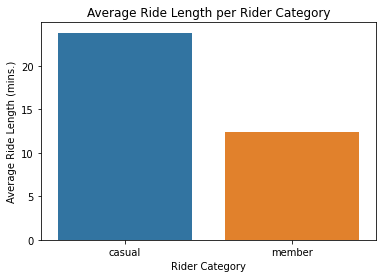

In [39]:
fig, ax = plt.subplots()
sns.barplot(x = avg_len_per_rider.index, y = avg_len_per_rider, ax=ax)
ax.set_xlabel('Rider Category')
ax.set_ylabel('Average Ride Length (mins.)')
ax.set_title('Average Ride Length per Rider Category')
plt.savefig('./visualizations from py notebook/Average Ride Length per Rider Category')

Findings - 
1. Casual riders ride longer than annual members.

## 2. Per day of week

In [53]:
avg_len_per_day = df.groupby('ride_day_of_week').ride_len_mins.mean().sort_values(ascending=False)

In [223]:
avg_len_per_day

ride_day_of_week
Sunday       21.050792
Saturday     20.570964
Monday       16.764313
Friday       16.198506
Thursday     15.156744
Wednesday    14.612108
Tuesday      14.579952
Name: ride_len_mins, dtype: float64

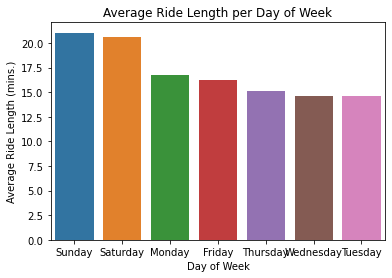

In [54]:
fig, ax = plt.subplots()
sns.barplot(x = avg_len_per_day.index, y = avg_len_per_day, ax=ax)
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Ride Length (mins.)')
ax.set_title('Average Ride Length per Day of Week')
plt.savefig('./visualizations from py notebook/Average Ride Length per Day of Week')

Findings-
1. Weekends have greater avg ride length than weekdays

#### 2.a. Per day of week per rider category

In [56]:
avg_len_per_day_per_rider = df.groupby(['member_casual', 'ride_day_of_week']).ride_len_mins.mean().unstack(0).sort_values('member', ascending=False)

In [229]:
avg_len_per_day_per_rider

member_casual,casual,member
ride_day_of_week,,
Sunday,27.100230,14.064812
Saturday,26.184477,13.915323
Friday,21.981865,12.031399
Monday,24.604598,12.015655
Thursday,20.961878,11.836282
Wednesday,20.454974,11.678916
Tuesday,20.830185,11.542768


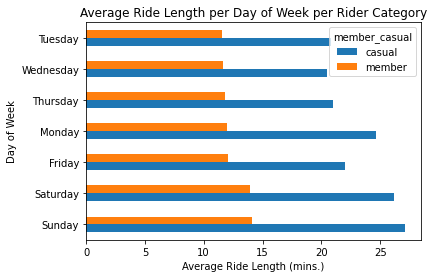

In [57]:
fig, ax = plt.subplots()
avg_len_per_day_per_rider.plot.barh(ax=ax)
ax.set_ylabel('Day of Week')
ax.set_xlabel('Average Ride Length (mins.)')
ax.set_title('Average Ride Length per Day of Week per Rider Category')
plt.savefig('./visualizations from py notebook/Average Ride Length per Day of Week per Rider Category')

Fidings-
1. For casual riders, there is a noteable increase in avg ride duration on weekends and monday but for annual riders, there is no/little difference between avg ride duration on different days of week.
2. On all days, avg ride duration of casual riders are much higher than annual members.

## 3. Per Month

In [232]:
avg_len_per_month = df.groupby('ride_month').ride_len_mins.mean().sort_values(ascending=False)

In [233]:
avg_len_per_month

ride_month
August       19.453711
May          18.546994
September    18.365699
July         18.244813
June         18.108360
October      16.093469
April        15.436093
March        15.331958
November     12.937329
December     12.490363
February     11.880635
January      11.112305
Name: ride_len_mins, dtype: float64

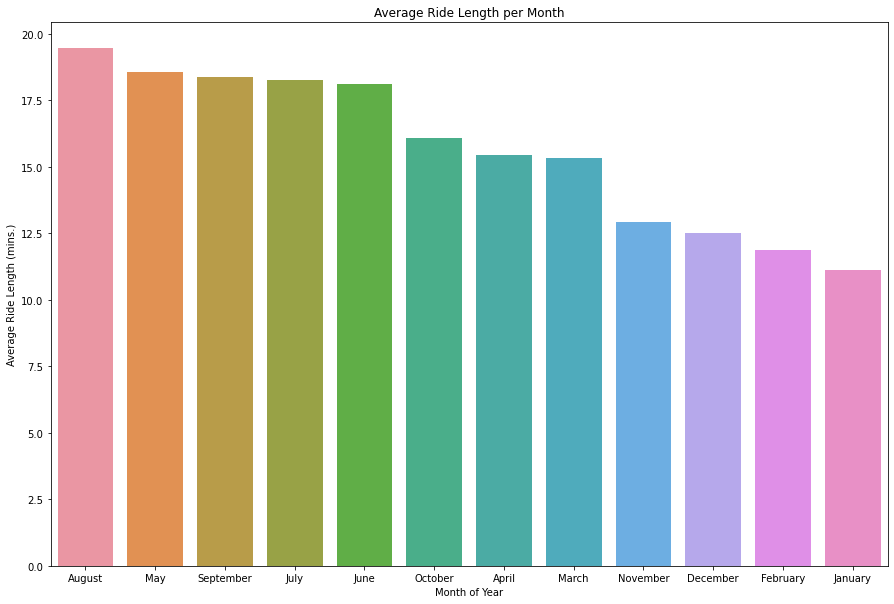

In [235]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x = avg_len_per_month.index, y = avg_len_per_month, ax=ax)
ax.set_xlabel('Month of Year')
ax.set_ylabel('Average Ride Length (mins.)')
ax.set_title('Average Ride Length per Month')
#plt.savefig('./visualizations from py notebook/Average Ride Length per Month')

Findings-
1. Avg ride length gradually decreases towards cold months.

#### 3.a. Per Month per rider category

In [236]:
avg_len_per_month_per_rider = df.groupby(['member_casual', 'ride_month']).ride_len_mins.mean().unstack(0).sort_values('member', ascending=False)

In [237]:
avg_len_per_month_per_rider

member_casual,casual,member
ride_month,,
June,23.408765,13.404071
August,25.419695,13.352573
July,23.490060,13.317249
May,25.612922,13.051148
September,24.480440,12.924445
October,22.602675,11.846152
March,24.147271,11.365802
April,23.699043,11.244258
November,18.780735,10.743756


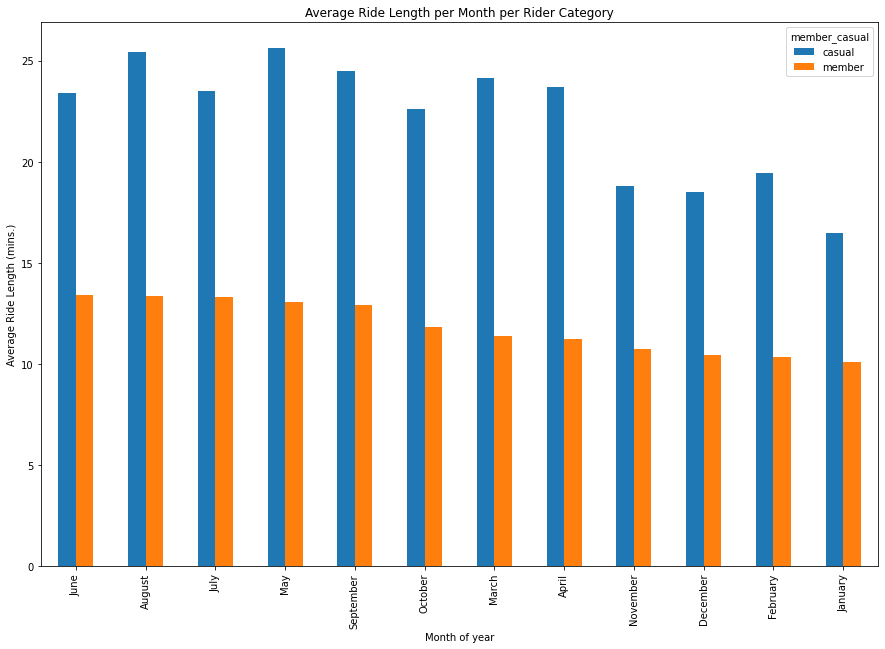

In [241]:
fig, ax = plt.subplots(figsize=(15,10))
avg_len_per_month_per_rider.plot.bar(ax=ax)
ax.set_xlabel('Month of year')
ax.set_ylabel('Average Ride Length (mins.)')
ax.set_title('Average Ride Length per Month per Rider Category')
#plt.savefig('./visualizations from py notebook/Average Ride Length per Month per Rider Category')

Findings-
1. Avg ride duration for annual members remains almost same throughout th year.
2. Avg ride duration for casual riders however drops in the winter months.

## 4. Per Season

In [60]:
avg_len_per_season = df.groupby('ride_season').ride_len_mins.mean().sort_values(ascending=False)

In [240]:
avg_len_per_season

ride_season
Summer(Jun-Aug)    18.621820
Spring(Mar-May)    16.990633
Autumn(Sep-Nov)    16.538465
Winter(Dec-Feb)    12.013606
Name: ride_len_mins, dtype: float64

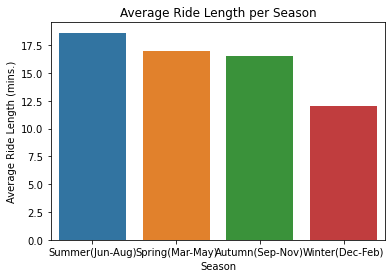

In [61]:
fig, ax = plt.subplots()
sns.barplot(x = avg_len_per_season.index, y = avg_len_per_season, ax=ax)
ax.set_xlabel('Season')
ax.set_ylabel('Average Ride Length (mins.)')
ax.set_title('Average Ride Length per Season')
plt.savefig('./visualizations from py notebook/Average Ride Length per Season')

Findings-
1. Summer has the highest avg. duration while WInter is the lowest

#### 4.a. Per Season per rider category

In [58]:
avg_len_per_season_per_rider = df.groupby(['member_casual', 'ride_season']).ride_len_mins.mean().unstack(0).sort_values('member', ascending=False)

In [246]:
avg_len_per_season_per_rider

member_casual,casual,member
ride_season,,
Summer(Jun-Aug),24.161779,13.357826
Spring(Mar-May),24.889672,12.107665
Autumn(Sep-Nov),23.114430,12.031611
Winter(Dec-Feb),18.350724,10.327237


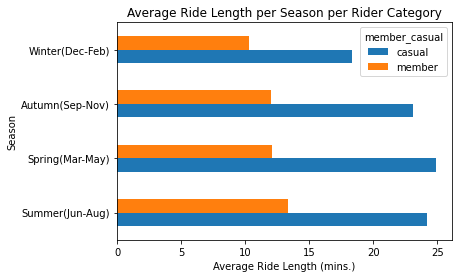

In [59]:
fig, ax = plt.subplots()
avg_len_per_season_per_rider.plot.barh(ax=ax)
ax.set_ylabel('Season')
ax.set_xlabel('Average Ride Length (mins.)')
ax.set_title('Average Ride Length per Season per Rider Category')
plt.savefig('./visualizations from py notebook/Average Ride Length per Season per Rider Category')

Findings-
1. Avg duration remains almost same accross seasons for annual members while decreses in winter for casual riders.

## 5. Per Hour of Day

In [62]:
avg_len_per_hour = df.groupby('ride_hour_of_day').ride_len_mins.mean().sort_index()

In [253]:
avg_len_per_hour

ride_hour_of_day
0     16.198370
1     16.199115
2     16.290826
3     15.969449
4     14.570283
5     11.538069
6     11.989436
7     12.371294
8     12.939289
9     15.974932
10    19.192196
11    19.959177
12    19.444513
13    20.079598
14    20.253627
15    19.088357
16    17.646171
17    16.744742
18    16.631268
19    16.570877
20    16.401823
21    15.935044
22    15.804334
23    16.094093
Name: ride_len_mins, dtype: float64

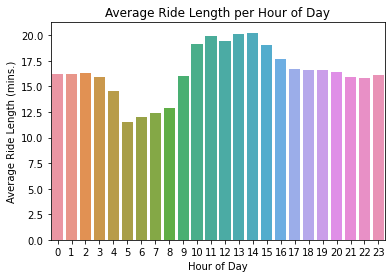

In [63]:
fig, ax = plt.subplots()
sns.barplot(x = avg_len_per_hour.index, y = avg_len_per_hour, ax=ax)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Average Ride Length (mins.)')
ax.set_title('Average Ride Length per Hour of Day')
plt.savefig('./visualizations from py notebook/Average Ride Length per Hour of Day')

Findings-
1. There is a significant decrease in avg ride duration during the morning hours(4-9am) and increase in the noon and afternoon time.

#### 5.a. Per Hour of Day per rider category

In [64]:
avg_len_per_hour_per_rider = df.groupby(['member_casual', 'ride_hour_of_day']).ride_len_mins.mean().unstack(0).sort_index()

In [261]:
avg_len_per_hour_per_rider

member_casual,casual,member
ride_hour_of_day,,
0,19.431882,11.570737
1,19.093494,11.692476
2,18.976014,11.632061
3,18.568052,11.829015
4,17.742703,11.698581
5,16.260717,10.011435
6,15.874636,10.945385
7,16.188573,11.349508
8,18.868271,11.092488


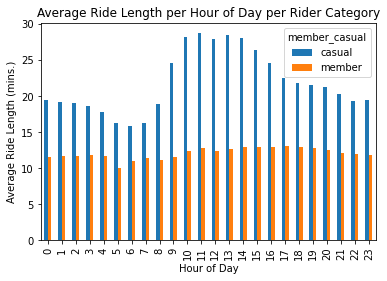

In [65]:
fig, ax = plt.subplots()
avg_len_per_hour_per_rider.plot.bar(ax=ax)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Average Ride Length (mins.)')
ax.set_title('Average Ride Length per Hour of Day per Rider Category')
plt.savefig('./visualizations from py notebook/Average Ride Length per Hour of Day per Rider Category')

Findings-
1. Avg duration for members remains almost same accross hours.
2. But for casual riders, there is an increase in avg duration in late morning to afternoon hours

## Total Ride Length

## 1. Per Rider Category

In [43]:
total_dutration = df.ride_len_mins.sum()

In [44]:
total_dutration

79352698.13999997

In [45]:
percentage_duration_per_rider = df.groupby('member_casual').ride_len_mins.sum() * 100 / total_dutration

In [47]:
percentage_duration_per_rider

member_casual
casual    58.254047
member    41.745953
Name: ride_len_mins, dtype: float64

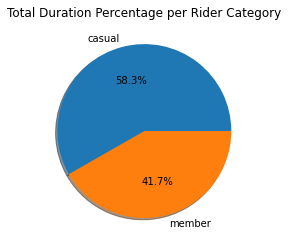

In [52]:
plt.pie(percentage_duration_per_rider, labels= percentage_duration_per_rider.index, autopct='%.1f%%', shadow=True)
plt.title('Total Duration Percentage per Rider Category')
plt.savefig('./visualizations from py notebook/Total Duration Percentage per Rider Category')